## Portfolio assignment 2 - Josephine K P Soerensen

### Part 1:
Load the 'divorce_margarine' dataset from the 'dslabs' package. Investigate the correlation between margarine consumption and divorce rates in Maine.

In [1]:
install.packages('dplyr')
install.packages('ggplot2')
install.packages('dslabs')

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



In [2]:
library(dslabs)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
# Investigating our data first

data(divorce_margarine)
head(divorce_margarine)
str(divorce_margarine)

,divorce_rate_maine,margarine_consumption_per_capita,year
,<dbl>,<dbl>,<int>
1,5.0,8.2,2000
2,4.7,7.0,2001
3,4.6,6.5,2002
4,4.4,5.3,2003
5,4.3,5.2,2004
6,4.1,4.0,2005


'data.frame':	10 obs. of  3 variables:
 $ divorce_rate_maine              : num  5 4.7 4.6 4.4 4.3 4.1 4.2 4.2 4.2 4.1
 $ margarine_consumption_per_capita: num  8.2 7 6.5 5.3 5.2 4 4.6 4.5 4.2 3.7
 $ year                            : int  2000 2001 2002 2003 2004 2005 2006 2007 2008 2009


In [4]:
cor.test(divorce_margarine$divorce_rate_maine, divorce_margarine$margarine_consumption_per_capita)


	Pearson's product-moment correlation

data:  divorce_margarine$divorce_rate_maine and divorce_margarine$margarine_consumption_per_capita
t = 23.055, df = 8, p-value = 1.33e-08
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9676666 0.9983038
sample estimates:
      cor 
0.9925585 


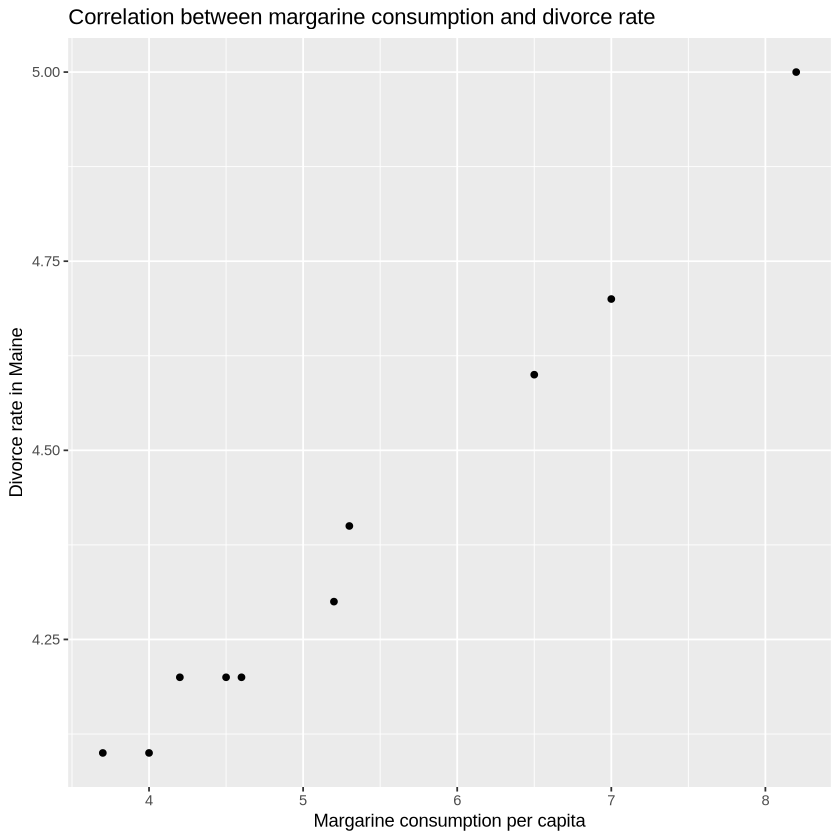

In [5]:
# There is a strong/positive correlation between margarine consumption and divorce rates in Maine
# We will plot the data to see it visually

ggplot(divorce_margarine,
       aes(x = margarine_consumption_per_capita,
           y = divorce_rate_maine)) + 
    geom_point() +
        labs(title = "Correlation between margarine consumption and divorce rate",
            x = "Margarine consumption per capita", 
            y = "Divorce rate in Maine")

# We visualized the data to make the correlation easier to see and interpret

**Would an increase in the preference for margarine lead to skyrocketing divorce rates?**

In this case we have the independent variable which is a persons margarine consumption
(x-axis), and the dependent variable which is the divorce rate (y-axis). We can see that
there is a strong/positive correlation and that the more margarine a person consumes, the higher
the divorce rate is. So the short and not very nuanced answer to the question is yes, from our analysis. Ofcourse it is 
not that simple in real life, and it would be more complex to answer if we were to dig deepter into it 

### Part 2: 

Load the ‘GSSvocab’ dataset from the ‘
car
’ package. This dataset contains people’s scores on
an English vocabulary test and includes demographic information.

In [19]:
install.packages('car')

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



In [22]:
library(car)

In [23]:
data(GSSvocab)
str(GSSvocab)

# Investigating the structure of our data

'data.frame':	28867 obs. of  8 variables:
 $ year      : Factor w/ 20 levels "1978","1982",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ gender    : Factor w/ 2 levels "female","male": 1 1 2 1 1 2 2 2 1 2 ...
 $ nativeBorn: Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ ageGroup  : Factor w/ 5 levels "18-29","30-39",..: 4 5 2 4 3 1 1 4 3 1 ...
 $ educGroup : Factor w/ 5 levels "<12 yrs","12 yrs",..: 2 1 1 2 2 2 2 2 4 2 ...
 $ vocab     : num  10 6 4 9 6 6 4 7 8 3 ...
 $ age       : num  52 74 35 50 41 19 19 59 49 21 ...
 $ educ      : num  12 9 10 12 12 12 12 12 16 12 ...


_____________________________________________________________________________________________________________________________
Filter for the year 1978 and remove rows with missing values (the function na.exclude() is one way to do this – check out the documentation!).

In [24]:
# Creating a dataframe with the new, filtered data, only containing data from the year 1978

dat1978 <- GSSvocab %>%
    filter(year==1978) # %>%
    # na.exclude(dat1978)
str(dat1978)

# In order to maintain overview of the data I excluded the rows seperately in the codecell below. I could also have combined
# them as demonstrated above, which normally would be preferable in order to keep it simple and easy to read

'data.frame':	1532 obs. of  8 variables:
 $ year      : Factor w/ 20 levels "1978","1982",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ gender    : Factor w/ 2 levels "female","male": 1 1 2 1 1 2 2 2 1 2 ...
 $ nativeBorn: Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ ageGroup  : Factor w/ 5 levels "18-29","30-39",..: 4 5 2 4 3 1 1 4 3 1 ...
 $ educGroup : Factor w/ 5 levels "<12 yrs","12 yrs",..: 2 1 1 2 2 2 2 2 4 2 ...
 $ vocab     : num  10 6 4 9 6 6 4 7 8 3 ...
 $ age       : num  52 74 35 50 41 19 19 59 49 21 ...
 $ educ      : num  12 9 10 12 12 12 12 12 16 12 ...


In [25]:
dat1978  <- na.exclude(dat1978) 
str(dat1978)

'data.frame':	1477 obs. of  8 variables:
 $ year      : Factor w/ 20 levels "1978","1982",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ gender    : Factor w/ 2 levels "female","male": 1 1 2 1 1 2 2 2 1 2 ...
 $ nativeBorn: Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ ageGroup  : Factor w/ 5 levels "18-29","30-39",..: 4 5 2 4 3 1 1 4 3 1 ...
 $ educGroup : Factor w/ 5 levels "<12 yrs","12 yrs",..: 2 1 1 2 2 2 2 2 4 2 ...
 $ vocab     : num  10 6 4 9 6 6 4 7 8 3 ...
 $ age       : num  52 74 35 50 41 19 19 59 49 21 ...
 $ educ      : num  12 9 10 12 12 12 12 12 16 12 ...
 - attr(*, "na.action")= 'exclude' Named int [1:55] 179 193 258 329 346 389 390 408 429 451 ...
  ..- attr(*, "names")= chr [1:55] "1978.179" "1978.193" "1978.258" "1978.329" ...


_____________________________________________________________________________________________________________________________
Is a person’s score on the vocabulary test (‘vocab’) significantly impacted by their level of education (‘educ’)? Visualize the relationship in a plot and build a model. Briefly explain the results.

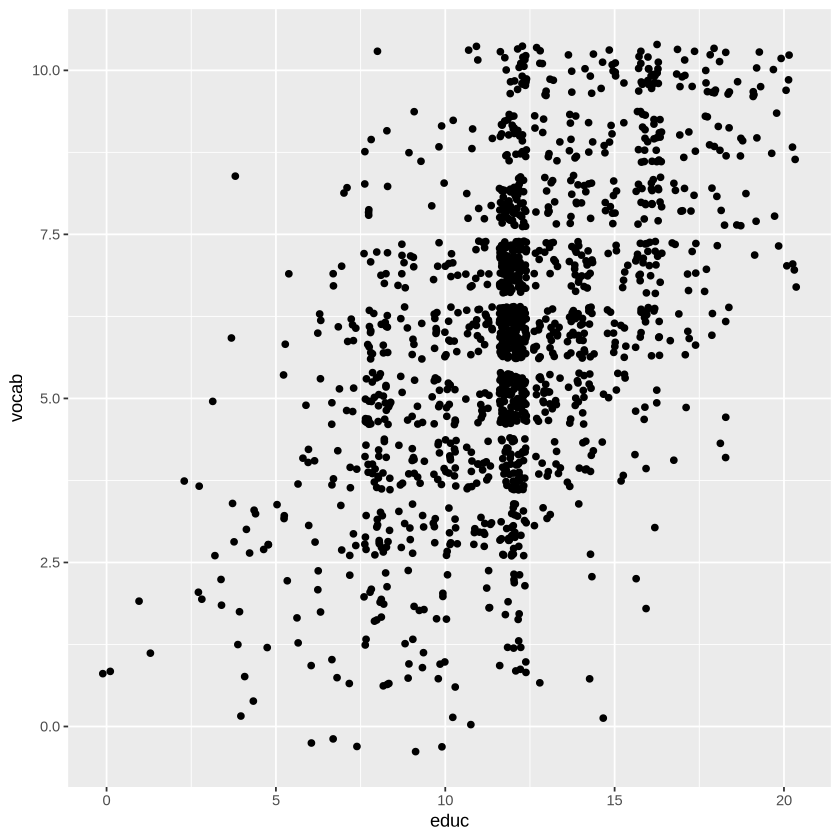

In [26]:
# From the scatterplot it seems that a persons score on the vocabulary test is impacted by level of education, since there is a
# general increase on the y-axis (vocab) as the x-axis (educ) value increases, which could indicate a positive correlation

ggplot(dat1978,
       aes(x = educ,
           y = vocab)) +
    geom_point(position = 'jitter') # When we use jitter we make sure that our results dont cluster

In [27]:
# Building a linear model 

vocab_model <- lm(vocab ~ educ, dat1978)
summary(vocab_model)

# The p-value shows that the test is significant. This is demonstrated in the low p-value that the predictor variable (educ) has

# The multiple R-squared value (0.288) tells us that 28,8% of the variance in the outcome variable (vocab) can be explained by
# the predictor variable (educ)



Call:
lm(formula = vocab ~ educ, data = dat1978)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1233 -1.1608  0.0542  1.0917  5.6243 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.23567    0.19957   6.192  7.7e-10 ***
educ         0.39251    0.01606  24.443  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.885 on 1475 degrees of freedom
Multiple R-squared:  0.2883,	Adjusted R-squared:  0.2878 
F-statistic: 597.5 on 1 and 1475 DF,  p-value: < 2.2e-16


_____________________________________________________________________________________________________________________________
Whether a person is the native of an English-speaking country (‘nativeBorn’) could potentially have an impact on the size of their vocabulary. Visualize the relationship and add the predictor to the model. Briefly explain the results.

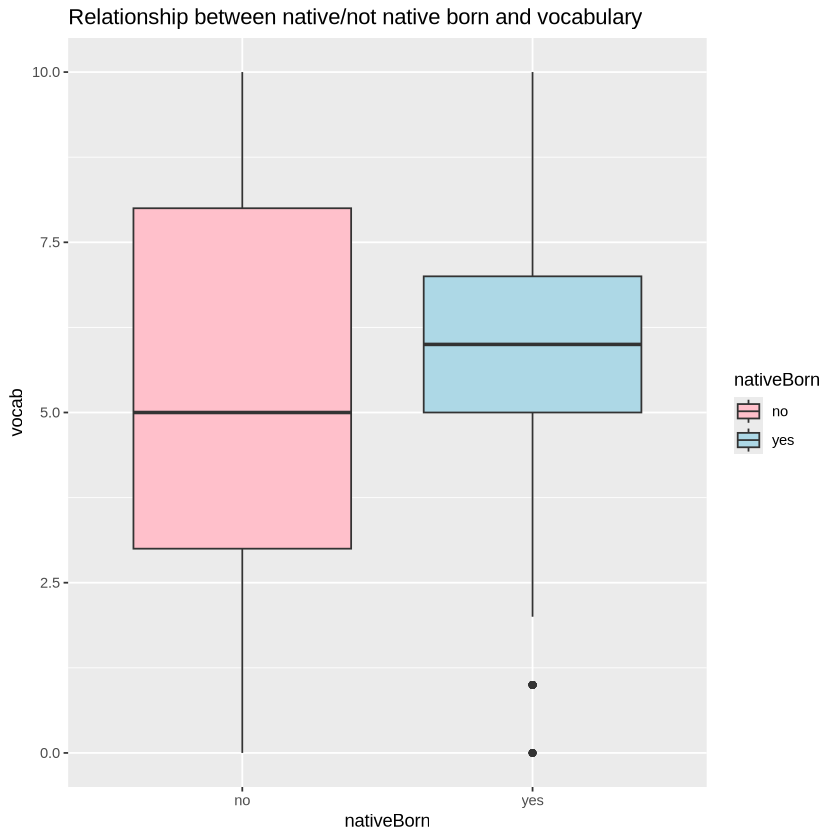

In [28]:
# Visualizing our data to be able to better interpret it

ggplot(dat1978, aes(x = nativeBorn, 
                    y = vocab, 
                    fill = nativeBorn)) +
    geom_boxplot() +
    scale_fill_manual(values = c("pink", "light blue")) +
                labs (title = "Relationship between native/not native born and vocabulary")

# This plot tells us that the median is higher for the native borns and lower for the people that are not native born.
# It also shows that there is a bigger variety in the size of vocabulary for the not-native borns (this could possibly also 
# explained by the amount of data there is on each category?)

In [29]:
# Building a model
vocab_model_2 <- lm(vocab ~ educ + nativeBorn, dat1978)
summary(vocab_model_2)

# For every increase in education, vocab is expected to increase by 0.39222. If a person is native born, their vocab score
# is expected to be 0.65032 higher than those who are not native borns 

# The p-value shows that the test is statistically significant. This is demonstrated in the low p-value the two predictor 
# variables (educ and nativeBornyes) have, both below 0.05. The p-value of the intercept also shows statisical significance, 
#since that is also below 0.05.


Call:
lm(formula = vocab ~ educ + nativeBorn, data = dat1978)

Residuals:
   Min     1Q Median     3Q    Max 
-7.162 -1.200  0.015  1.231  5.803 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.62803    0.27651   2.271  0.02327 *  
educ           0.39222    0.01601  24.499  < 2e-16 ***
nativeBornyes  0.65032    0.20551   3.164  0.00159 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.879 on 1474 degrees of freedom
Multiple R-squared:  0.2931,	Adjusted R-squared:  0.2921 
F-statistic: 305.6 on 2 and 1474 DF,  p-value: < 2.2e-16


_____________________________________________________________________________________________________________________________
Does a person’s level of education depend on whether they are a native of the country?
Visualize the relationship. 

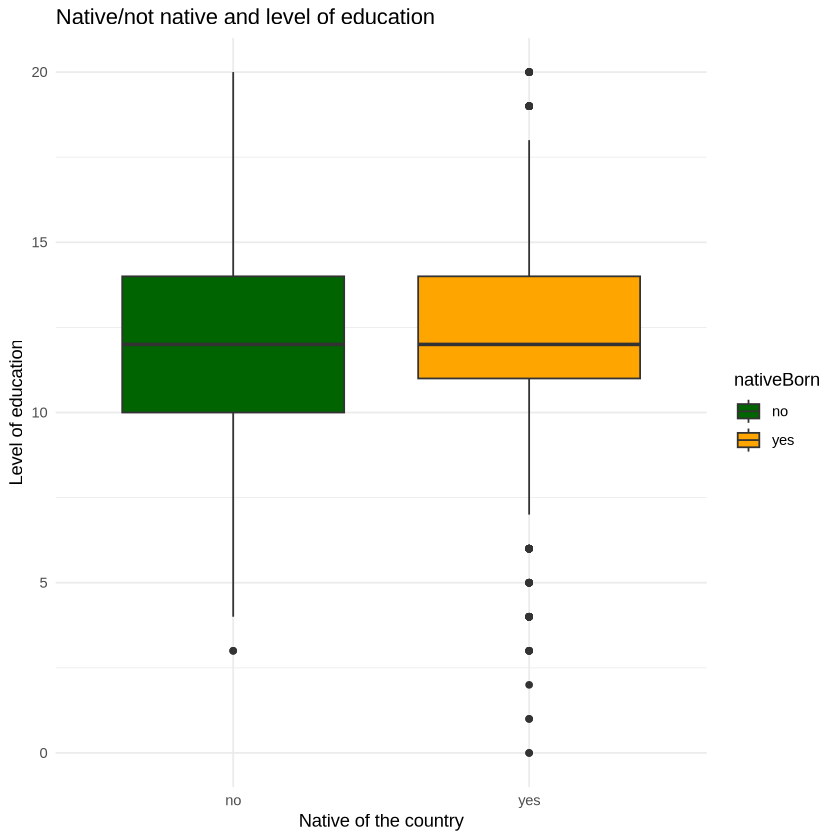

In [32]:
ggplot(dat1978, aes(x = nativeBorn, 
                    y = educ, 
                    fill = nativeBorn)) +
    geom_boxplot() +
    scale_fill_manual(values = c("dark green", "orange")) +
            labs(title = "Native/not native and level of education",
                    x = "Native of the country", 
                    y = "Level of education") + 
    theme_minimal()

# There are a slighty higher proportion of not native borns with a lower level of education compared native borns, but the difference is so small
# that it is not really significant for our analysis. Overall, the visualization shows that there isn't a big difference on education level based
# on whether someone is native born or not 


Do you think it makes sense to add the relationship as an interaction term? Try creating the model and briefly explain the results.

In [34]:
# I think it's (almost) always a good idea to add as many predictors as possible, assuming that 
# the more data you have, the stronger your data is, because it is then more representative

vocab_model_3 <- lm(vocab ~ nativeBorn * educ, dat1978)
summary(vocab_model_3)

# The p-values show us that it is only the educ variable is statistically significant 
# This also means that there is strong evidence that for every increase of 1 year in 
# education, the vocab score will increase by 0.41510. 

# Without looking at education too, there is no statistical significance proving that
# being native born (nativebornyes) in it self has an effect on a persons vocabulary score.
# The interaction term is not statistically significant either. So this means that the 
# relationship between vocab and education does not depend significantly on whether a person 
# is native-born or not.



Call:
lm(formula = vocab ~ nativeBorn * educ, data = dat1978)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1554 -1.2049  0.0149  1.2347  5.9857 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.35394    0.68780   0.515    0.607    
nativeBornyes       0.95000    0.71855   1.322    0.186    
educ                0.41510    0.05496   7.553 7.45e-14 ***
nativeBornyes:educ -0.02501    0.05745  -0.435    0.663    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.88 on 1473 degrees of freedom
Multiple R-squared:  0.2932,	Adjusted R-squared:  0.2917 
F-statistic: 203.7 on 3 and 1473 DF,  p-value: < 2.2e-16


_____________________________________________________________________________________________________________________________
Which model performs best?

In [39]:
anova(vocab_model, vocab_model_2, vocab_model_3)

# From our anova test it is clear that model 2 performs best, because of it's low p-value
# proving statistical signifance (0.0016). This model with the added predictor (educ), can 
# therefore be argued to have a strong effect on our outcome variable (vocab). 

# In model 3 we explored the interaction between educ and nativeBorn, but this does
# not improve the model, looking at the high p-value (0.663), which means that this
# model cannot be argued to be statisically significant. Therefore we can see that
# being native born does not have a big impact on a persons vocabulary score.


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1475,5241.828,NA,NA,NA,NA
2,1474,5206.458,1,35.3707012,10.0082911,0.001590199
3,1473,5205.788,1,0.6695224,0.1894442,0.663443355


When creating plots, try to play around with the options of ggplot2 – add titles and axis labels, and consider using colours.